In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("LinearData.csv")
df.head()

,X,Y
0,1,953
1,2,2068
2,3,2871
3,4,3972
4,5,5240


In [3]:
df

,X,Y
0,1,953
1,2,2068
2,3,2871
3,4,3972
4,5,5240
5,6,5610
6,7,7196
7,8,7936
8,9,8577
9,10,10950


In [4]:
X=df.iloc[:,:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30]])

In [5]:
Y=df.iloc[:,-1].values
Y

array([  953,  2068,  2871,  3972,  5240,  5610,  7196,  7936,  8577,
       10950, 11077, 12468, 13780, 13888, 14325, 14496, 16116, 17064,
       20387, 18620, 20517, 22264, 22770, 25344, 23450, 28522, 25920,
       30072, 31813, 32370])

In [6]:
model = sm.OLS(Y, X)
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              7753.
Date:                Sun, 27 Jun 2021   Prob (F-statistic):                    8.94e-37
Time:                        13:33:28   Log-Likelihood:                         -252.85
No. Observations:                  30   AIC:                                      507.7
Df Residuals:                      29   BIC:                                      509.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
print('Parameters: ', res.params)
print('R2: ', res.rsquared)

Parameters:  [1019.43014278]
R2:  0.9962736274162429


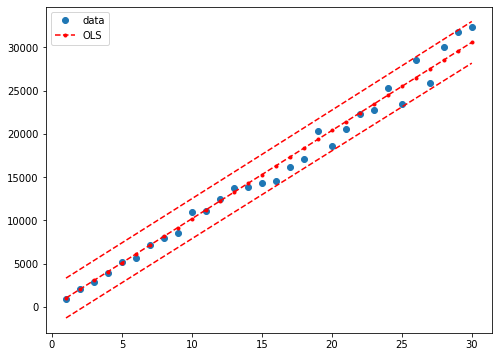

In [8]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, Y, 'o', label="data")
ax.plot(X, res.fittedvalues, 'r--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best');